In [30]:
library(ggbiplot)
library(factoextra)
library(NbClust)
library(FunCluster)
library(pca3d)
library(e1071)
library(poLCA)
library(reshape2)

In [2]:
s123 <- read.csv("C:\\Users\\marpr\\Desktop\\docto\\respuestas-s123.csv", sep=',')
s123 <-  scale((s123))
s123 <- data.frame(s123)
# s123 = pd.DataFrame(s123)
# s123.columns = ['s1-High','s1-Medium High','s1-Medium Low','s1-Low','s3-High','s3-Medium','s3-Low','s2-Relatively High','s2-Relatively Low']
s1 <- s123[,1:4]
s3 <- s123[,5:7]
s2 <- s123[,8:9]
s123

s1.High,s1.Medium.High,s1.Medium.Low,s1.Low,S3.1,S3.2,S3.3,s2.Relatively.High,s2.Relatively.Low
-0.5665622,-0.02029991,1.3499545,0.6047592,-0.87391025,0.2311756,0.84709472,-0.72445124,0.81891015
-0.5665622,1.34994395,1.0189030,0.6047592,-0.57485351,1.0634078,-0.02586549,-0.15523955,0.23143113
0.7674941,-0.47704786,-1.1329319,-0.8531424,1.96712878,-1.6413468,-1.18981243,1.19016990,-1.15715564
1.0639511,-1.39054376,-1.2984576,1.0907264,1.21948693,-1.4332888,0.26512125,0.20698607,-0.46286226
-0.5665622,2.94856178,-0.4708288,-0.8531424,0.17278834,-0.3929985,-0.31685222,0.87969079,-0.83671254
-0.5665622,0.20807407,0.6878515,0.6047592,-0.12626840,0.6472917,-0.02586549,0.51746517,-0.56967662
-0.5665622,-0.02029991,0.6878515,-0.8531424,0.02325997,-0.1849405,0.26512125,-0.51746517,0.28483831
-0.7147906,0.66482202,-0.1397773,0.6047592,-0.57485351,0.6472917,-0.02586549,0.00000000,-0.19582634
-0.2701052,0.89319599,-0.1397773,0.1187920,-0.42532514,1.2714658,0.26512125,0.56921169,-0.56967662
-0.4183337,0.43644804,1.0189030,0.6047592,-0.72438188,0.4392337,0.84709472,-1.03493034,0.87231733



Component loadings:
                   Comp.1     Comp.2     Comp.3     Comp.4
s1.High         0.6202815  0.2351520  0.1845724 0.72518094
s1.Medium.High -0.2095547 -0.7949767  0.4731396 0.31660338
s1.Medium.Low  -0.6177962  0.1208627 -0.4796070 0.61130771
s1.Low         -0.4355060  0.5459924  0.7155760 0.01333396

Component variances:
   Comp.1    Comp.2    Comp.3    Comp.4 
2.2383794 1.2749564 0.3815331 0.1051311 

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4
Standard deviation     1.4961215 1.1291397 0.61768364 0.32423934
Proportion of Variance 0.5595948 0.3187391 0.09538327 0.02628279
Cumulative Proportion  0.5595948 0.8783339 0.97371721 1.00000000


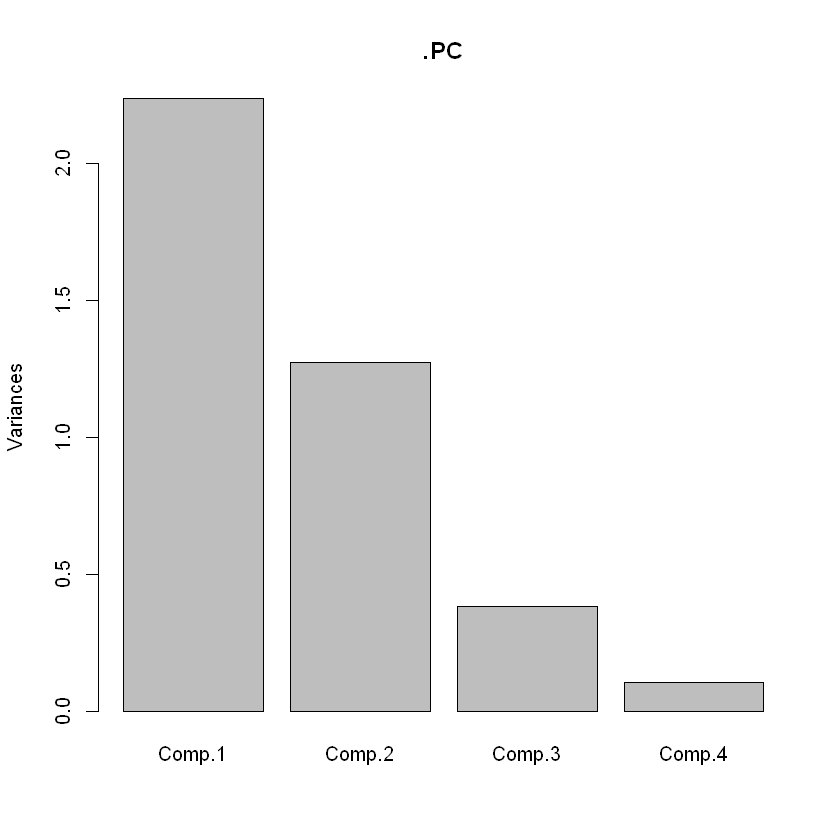

In [3]:
.PC <- princomp(~s1.High+s1.Medium.High+s1.Medium.Low+s1.Low, cor=TRUE, 
data=s123)
cat("\nComponent loadings:\n")
print(unclass(loadings(.PC)))
cat("\nComponent variances:\n")
print(.PC$sd^2)
cat("\n")
print(summary(.PC))
screeplot(.PC)

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


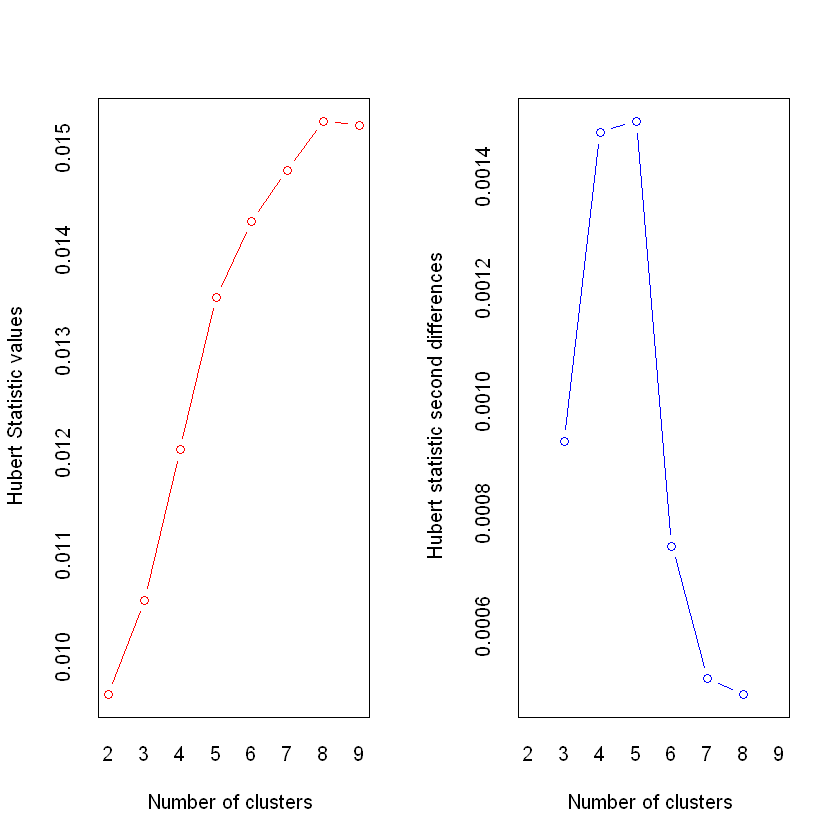

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 3 proposed 2 as the best number of clusters 
* 16 proposed 3 as the best number of clusters 
* 1 proposed 5 as the best number of clusters 
* 1 proposed 8 as the best number of clusters 
* 2 proposed 9 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 


$subtitle
[1] "A ver statistic method"

attr(,"class")
[1] "labels"

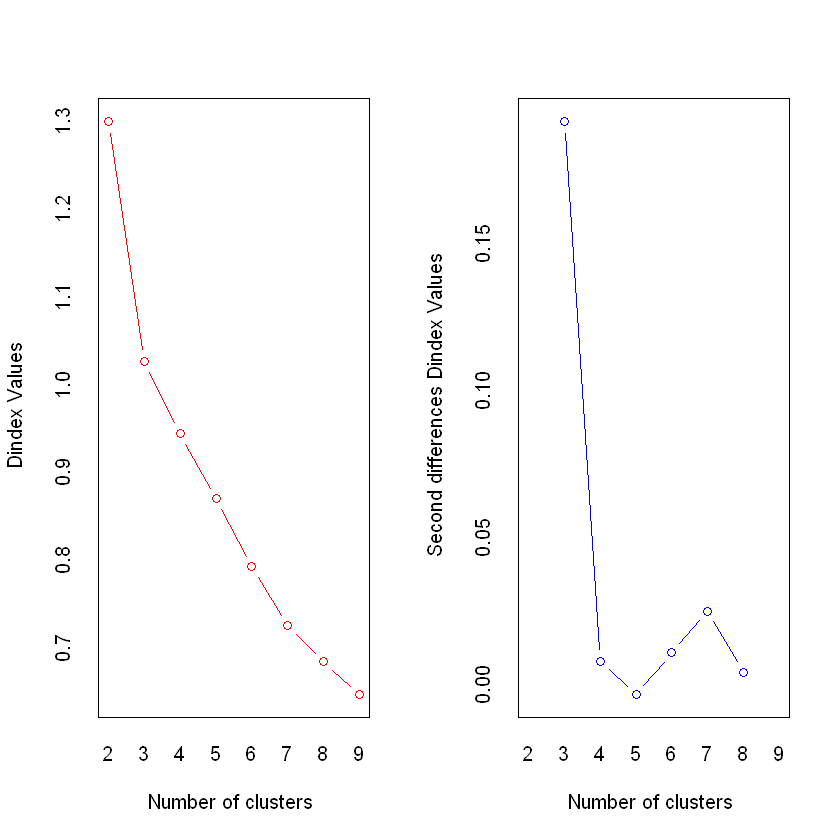

In [32]:
cl_s1 <- NbClust(s1, distance = "euclidean",
        min.nc = 2, max.nc = 9, method = "kmeans", index = "all")
        labs(subtitle = "A ver statistic method")

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


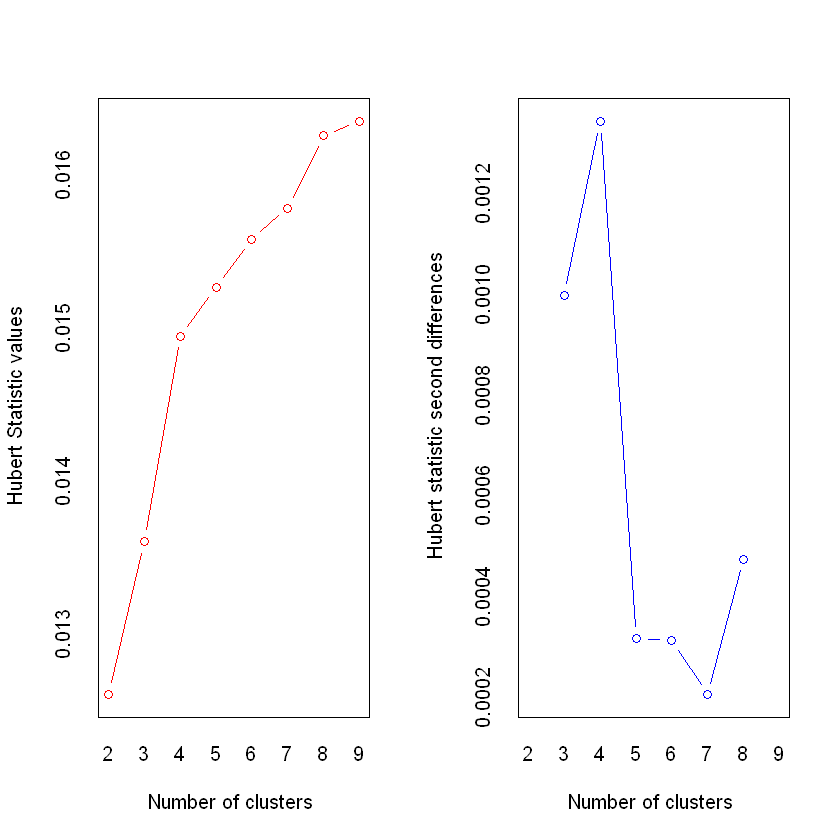

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 11 proposed 2 as the best number of clusters 
* 6 proposed 3 as the best number of clusters 
* 1 proposed 7 as the best number of clusters 
* 5 proposed 8 as the best number of clusters 
* 1 proposed 9 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
******************************************************************* 


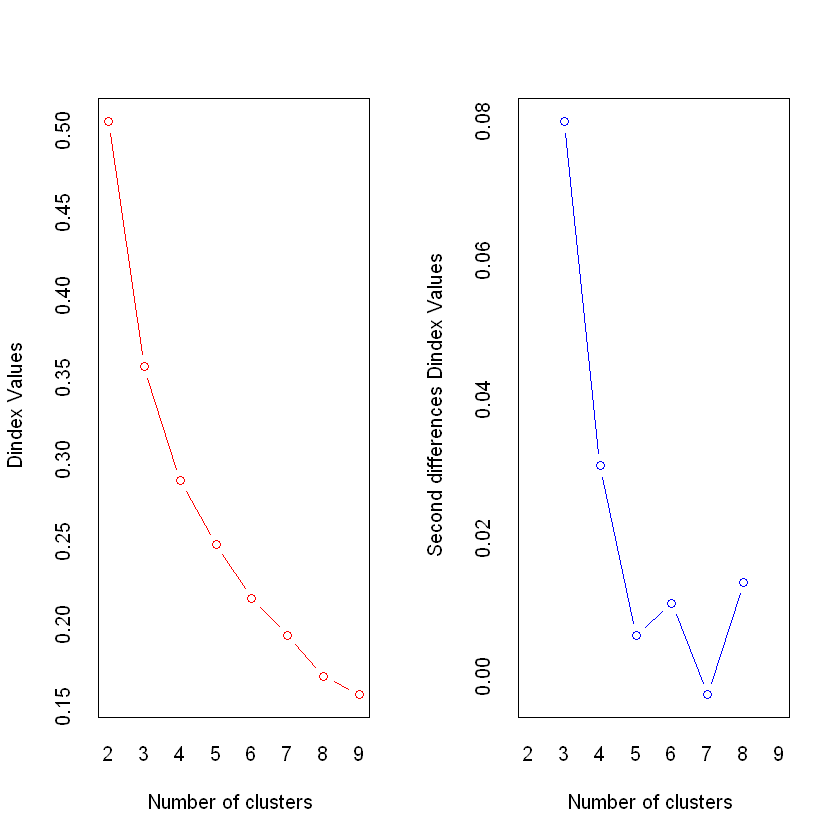

In [33]:
cl_s2 <- NbClust(s2, distance = "euclidean",
        min.nc = 2, max.nc = 9, method = "kmeans", index = "all")#  c("ward.D", "ward.D2", "single", "complete", "average", "kmeans", "centroid"))
#         labs(subtitle = "A ver statistic method")

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


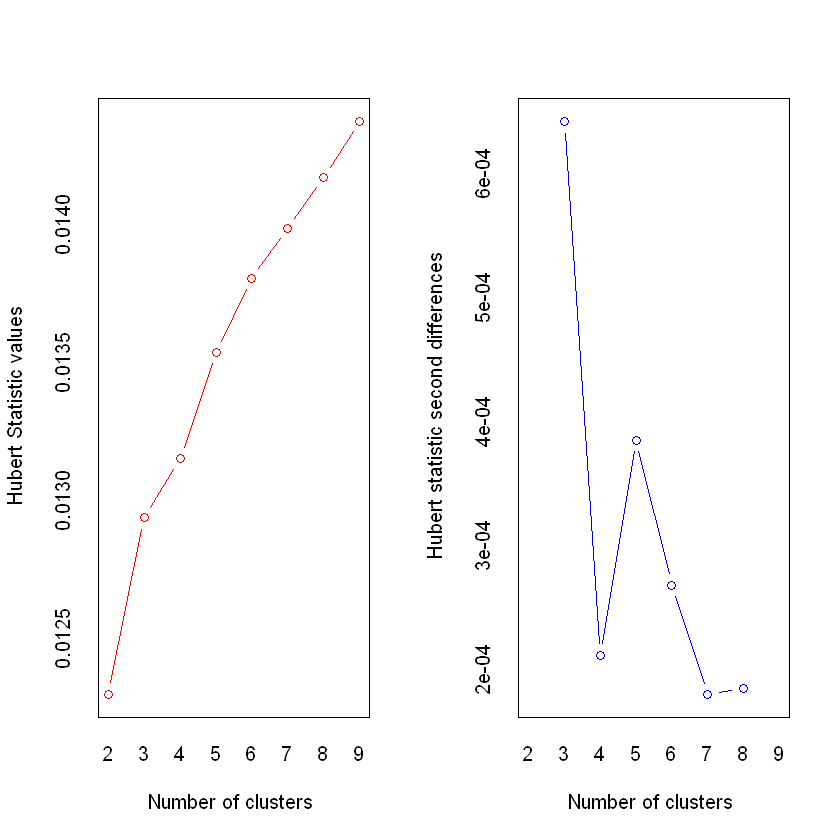

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 7 proposed 2 as the best number of clusters 
* 14 proposed 3 as the best number of clusters 
* 1 proposed 5 as the best number of clusters 
* 1 proposed 8 as the best number of clusters 
* 1 proposed 9 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 


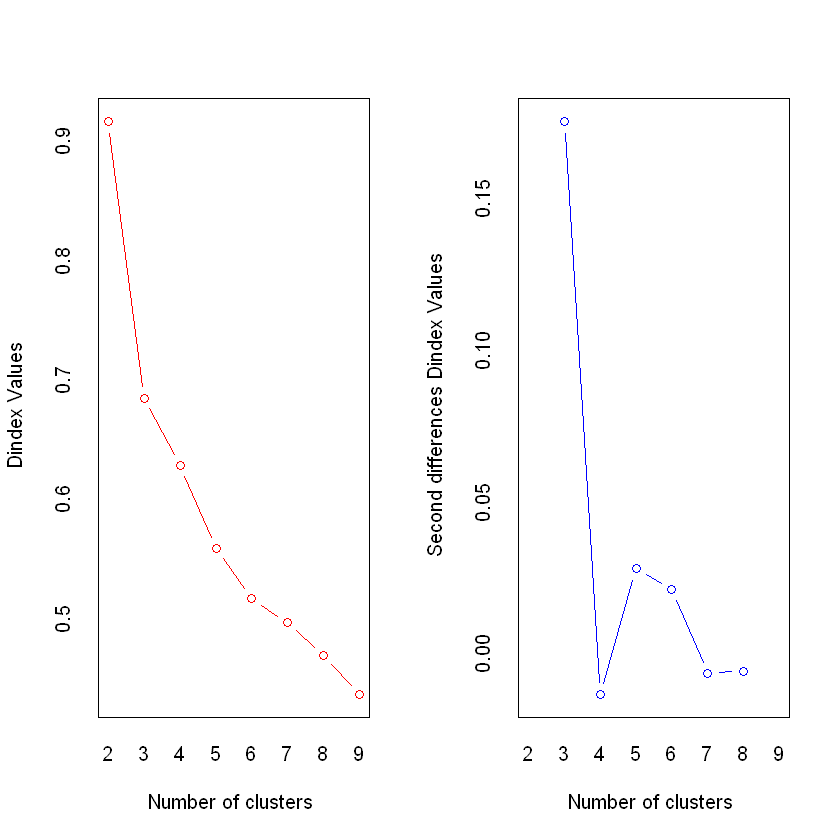

In [34]:
cl_s3 <- NbClust(s3, distance = "euclidean",
        min.nc = 2, max.nc = 9, method = "kmeans", index = "all")#c("ward.D", "ward.D2", "single", "complete", "average", "kmeans", "centroid"))
#         labs(subtitle = "A ver statistic method")
all <- cl_s3$All.index

# Elbow, Silhouette and GAP statistic method - Survey 1

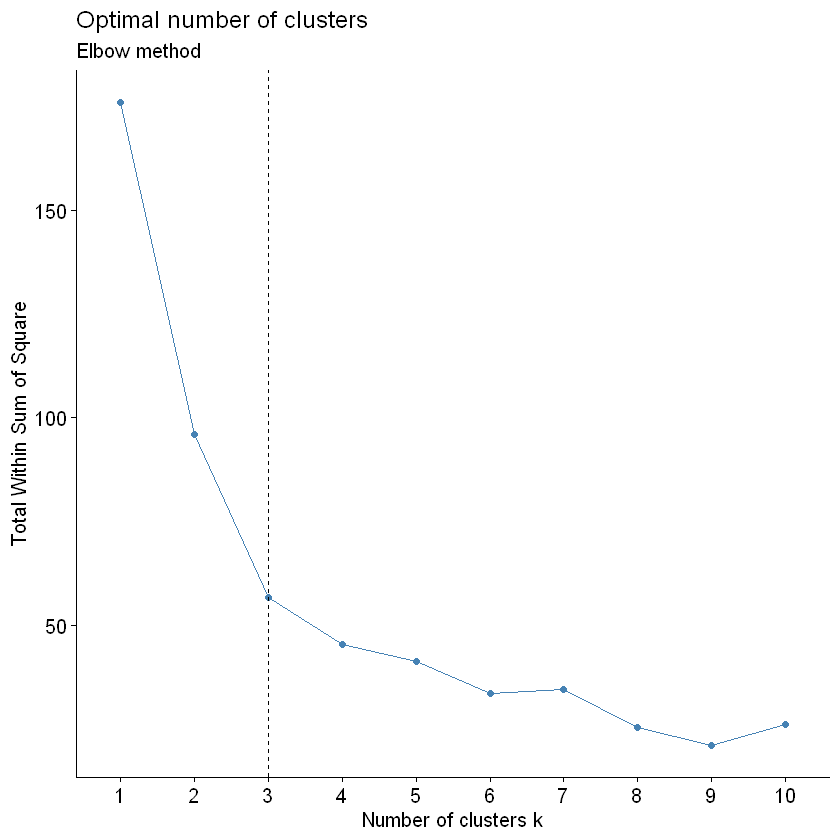

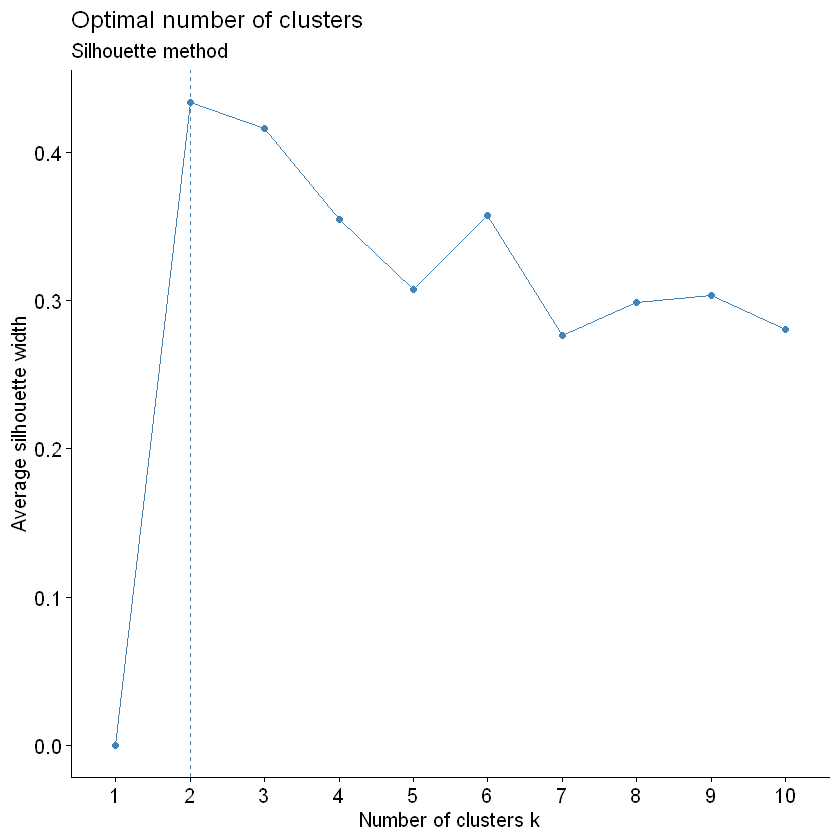

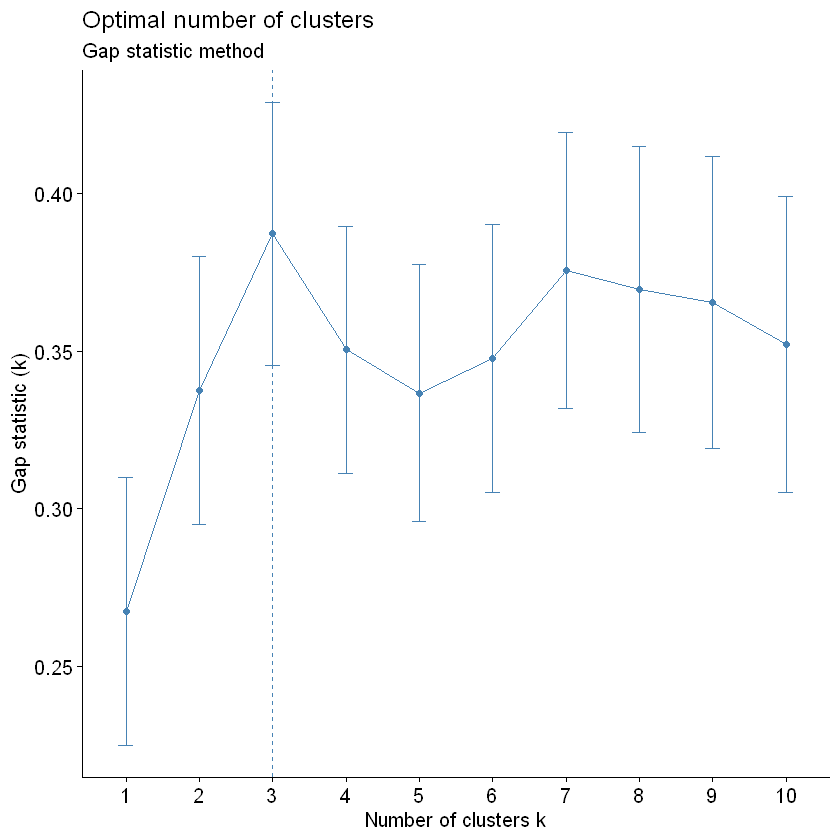

In [12]:
# png('S1_elbow.png', width = 3.25,
#   height    = 3.25,
#   units     = "in",
#   res       = 1200,
#   pointsize = 3)
# Elbow method
fviz_nbclust(s1, kmeans, method = "wss") +
    geom_vline(xintercept = 3, linetype = 2)+
  labs(subtitle = "Elbow method")
# dev.off()

# png('S1_silhouette.png', width = 3.25,
#   height    = 3.25,
#   units     = "in",
#   res       = 1200,
#   pointsize = 3)
# Silhouette method
fviz_nbclust(s1, kmeans, method = "silhouette")+
  labs(subtitle = "Silhouette method")
# dev.off()


# png('S1_gap.png', width = 3.25,
#   height    = 3.25,
#   units     = "in",
#   res       = 1200,
#   pointsize = 3)
# Gap statistic
# nboot = 50 to keep the function speedy. 
# recommended value: nboot= 500 for your analysis.
# Use verbose = FALSE to hide computing progression.
set.seed(123)
fviz_nbclust(s1, kmeans, nstart = 25,  method = "gap_stat", nboot = 500)+
  labs(subtitle = "Gap statistic method")
# dev.off()


# Elbow, Silhouette and GAP statistic method - Survey 2

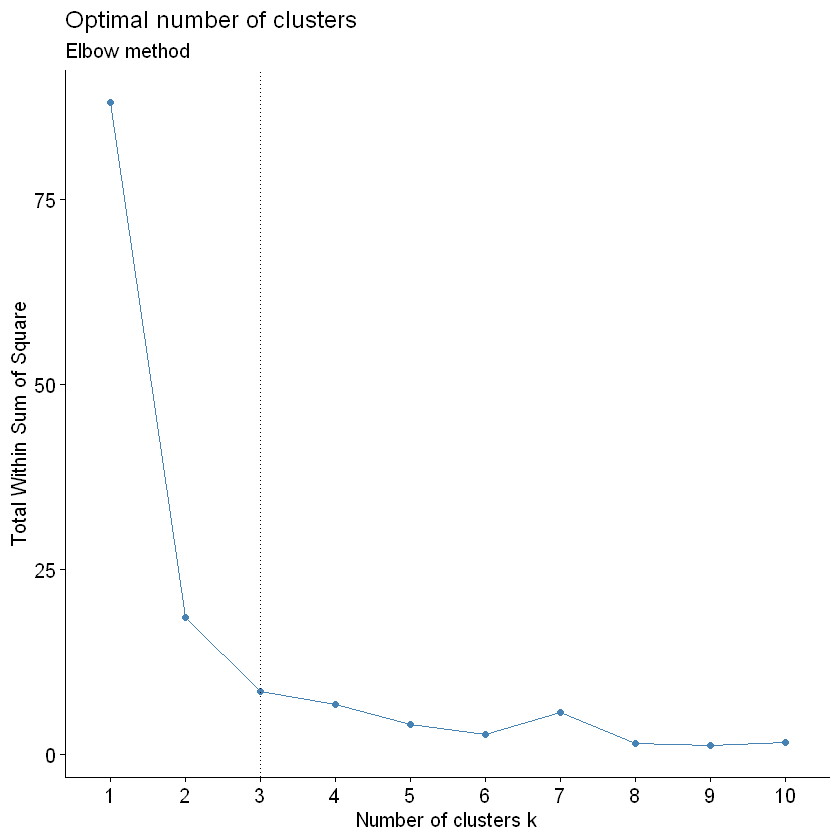

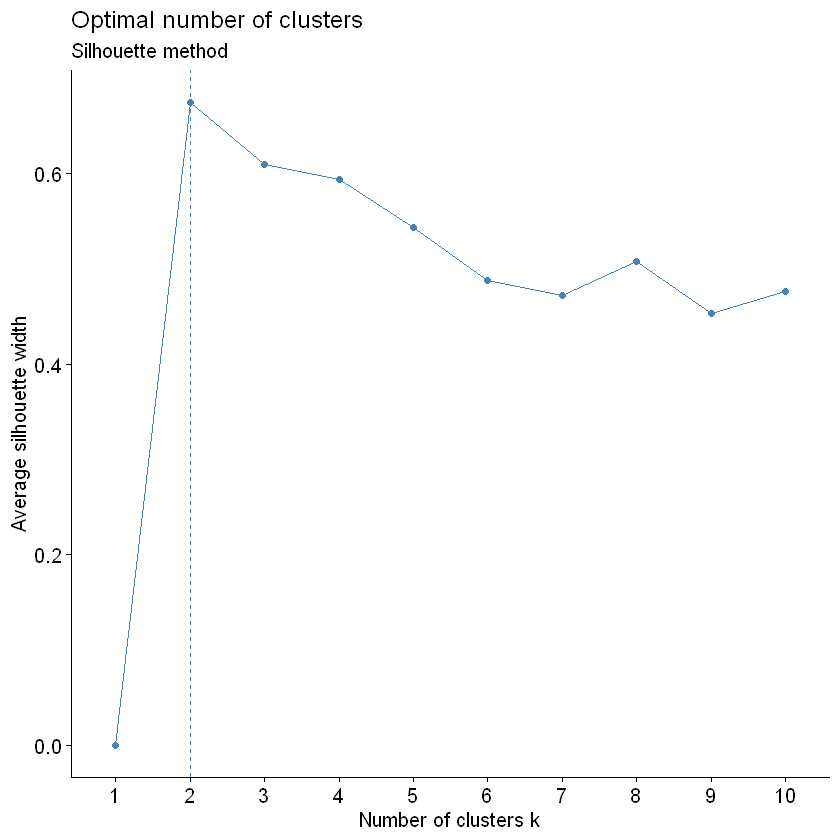

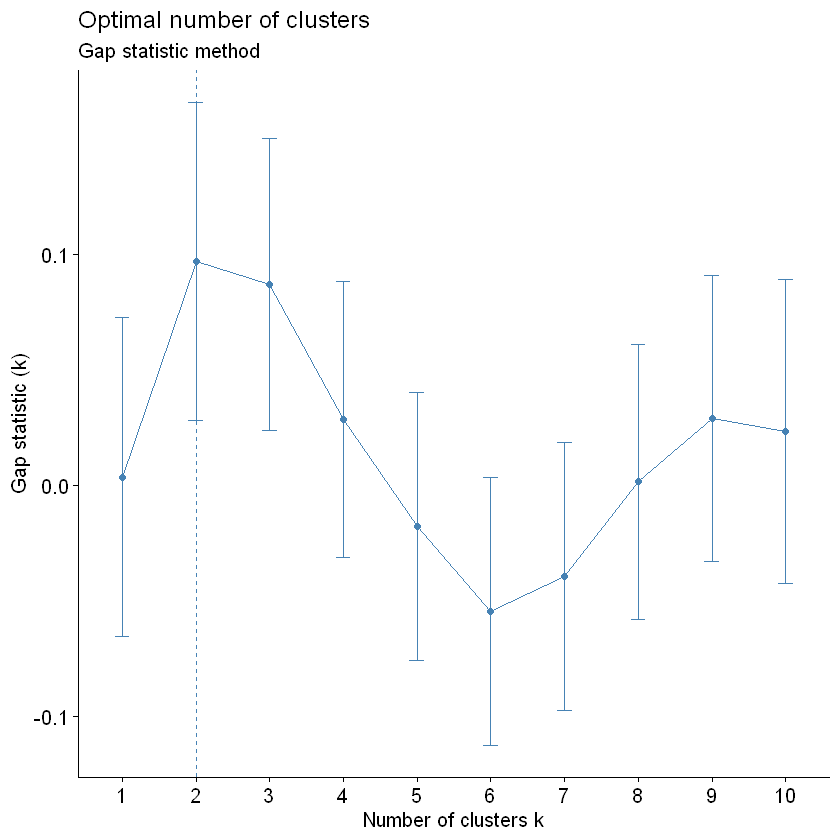

In [13]:
# png('S2_elbow.png', width = 3.25,
#   height    = 3.25,
#   units     = "in",
#   res       = 1200,
#   pointsize = 3)
# Elbow method
fviz_nbclust(s2, kmeans, method = "wss") +
    geom_vline(xintercept = 3, linetype = 3)+
  labs(subtitle = "Elbow method")
# dev.off()


# png('S2_silhouette.png', width = 3.25,
#   height    = 3.25,
#   units     = "in",
#   res       = 1200,
#   pointsize = 3)
# Silhouette method
fviz_nbclust(s2, kmeans, method = "silhouette")+
  labs(subtitle = "Silhouette method")
# dev.off()


# png('S2_gap.png', width = 3.25,
#   height    = 3.25,
#   units     = "in",
#   res       = 1200,
#   pointsize = 3)
# Gap statistic
# nboot = 50 to keep the function speedy. 
# recommended value: nboot= 500 for your analysis.
# Use verbose = FALSE to hide computing progression.
set.seed(123)
fviz_nbclust(s2, kmeans, nstart = 25,  method = "gap_stat", nboot = 500)+
  labs(subtitle = "Gap statistic method")
# dev.off()


# Elbow, Silhouette and GAP statistic method - Survey 3

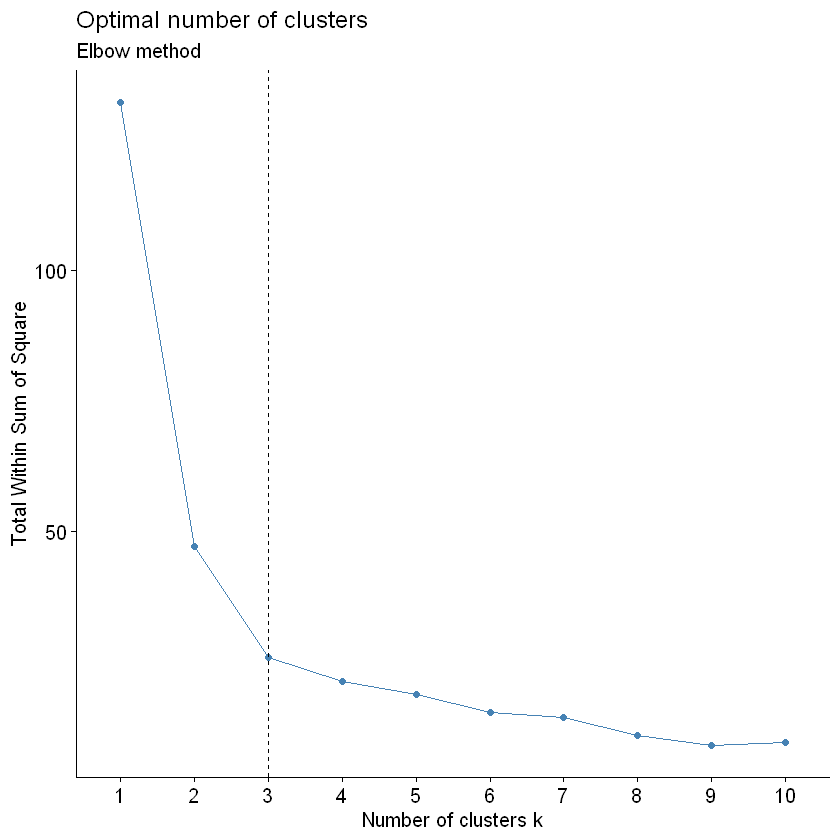

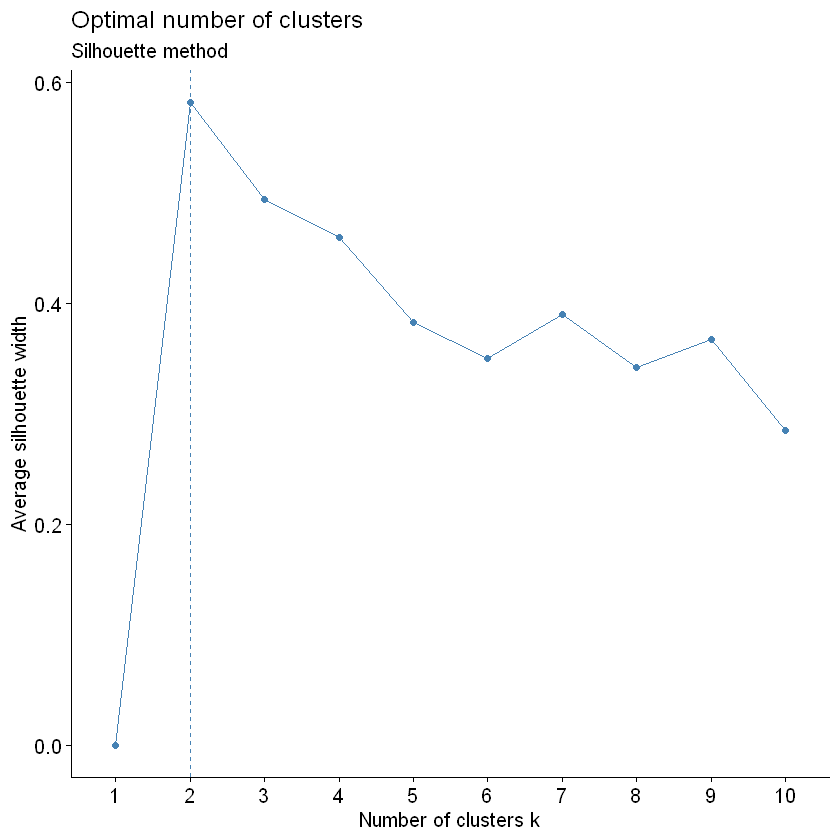

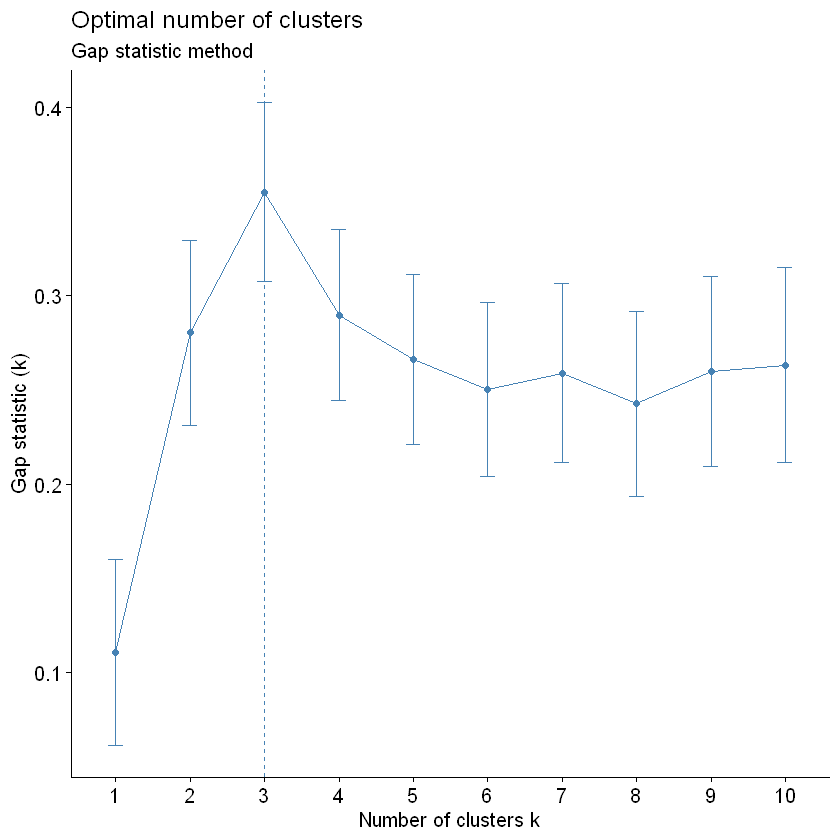

In [14]:
# png('S3_elbow.png', width = 3.25,
#   height    = 3.25,
#   units     = "in",
#   res       = 1200,
#   pointsize = 3)
# Elbow method
fviz_nbclust(s3, kmeans, method = "wss") +
    geom_vline(xintercept = 3, linetype = 2)+
  labs(subtitle = "Elbow method")
# dev.off()


# png('S3_silhouette.png', width = 3.25,
#   height    = 3.25,
#   units     = "in",
#   res       = 1200,
#   pointsize = 3)
# Silhouette method
fviz_nbclust(s3, kmeans, method = "silhouette")+
  labs(subtitle = "Silhouette method")
# dev.off()


# png('S3_gap.png', width = 3.25,
#   height    = 3.25,
#   units     = "in",
#   res       = 1200,
#   pointsize = 3)
# Gap statistic
# nboot = 50 to keep the function speedy. 
# recommended value: nboot= 500 for your analysis.
# Use verbose = FALSE to hide computing progression.
set.seed(123)
fviz_nbclust(s3, kmeans, nstart = 25,  method = "gap_stat", nboot = 500)+
  labs(subtitle = "Gap statistic method")
# dev.off()


# Kruskal-Wallis and U-Mann Whitney test

In [16]:
q2 <- read.csv("C:\\Users\\marpr\\Desktop\\docto\\thesis\\score_q1_q2.csv", header = T, sep = ";", stringsAsFactors = T)

sc1_q1_q2 <- q2[,1:2]
sc2_q1_q2 <- q2[,3:4]
sc3_q1_q2 <- q2[,5:6]

count <- as.vector(t(q2$Score.S1_q2))
s1_q2 <- data.frame(count)
s1_q2['survey'] <- 'S1'
s1_q2['count'] <- count

count <- as.vector(t(q2$Score.S2_q2))
s2_q2 <- data.frame(count)
s2_q2['survey'] <- 'S2'
s2_q2['count'] <- count

count <- as.vector(t(q2$Score.S3_q2))
s3_q2 <- data.frame(count)
s3_q2['survey'] <- 'S3'
s3_q2['count'] <- count

Data <- bind_rows(s2_q2,s3_q2)

pop_simil_1 <- wilcox.test(q2$Score.S1_q1, q2$Score.S1_q2, data = q2_s2, correct = FALSE)
pop_simil_2 <- wilcox.test(q2$Score.S2_q1, q2$Score.S2_q2, data = q2_s2, correct = FALSE)
pop_simil_3 <- wilcox.test(q2$Score.S3_q1, q2$Score.S3_q2, data = q2_s2, correct = FALSE)
pop_simil_q1_s1_s2_s3 <- kruskal.test(data.frame(q2$Score.S1_q1, q2$Score.S2_q1, q2$Score.S3_q1), data = q2) 
pop_simil_q1_s2_s3 <- wilcox.test(q2$Score.S2_q1, q2$Score.S3_q1, data = q2, correct = FALSE) 


# Ho or "Null hypothesis" = Population responses distribution are the same for the three surveys. Same population.
# H1 or  "Alternative hypothesis" = Population responses distribution are NOT the same for the three surveys. Same population.
# How p-value > 0.05. We can not reject the null hypothesis (H0). Therefore, we accept H1.
# data.frame(q2$Score.S1_q1, q2$Score.S2_q1, q2$Score.S3_q1)
wilcox.test(q2$Score.S1_q1, q2$Score.S2_q1, data = q2, correct = FALSE)
wilcox.test(q2$Score.S1_q1, q2$Score.S3_q1, data = q2, correct = FALSE)
pop_simil_q1_s2_s3
pop_simil_q1_s1_s2_s3
wilcox.test(q2$Score.S3_q2, q2$Score.S2_q2, data = q2_s2, correct = FALSE)

pop_simil_1
pop_simil_2
pop_simil_3

# wilcox.test(q2$Score.S1_q2, q2$Score.S2_q2, data = q2_s2, correct = FALSE)
# wilcox.test(q2$Score.S1_q2, q2$Score.S3_q2, data = q2_s2, correct = FALSE)
# wilcox.test(q2$Score.S3_q2, q2$Score.S2_q2, data = q2_s2, correct = FALSE)
# wilcox.test(q2$Score.S1_q2, q2$Score.S3_q2, data = q2, correct = FALSE)

# kruskal.test(data.frame(q2$Score.S1_q2, q2$Score.S2_q2, q2$Score.S3_q2), data = q2)
# q2


	Wilcoxon rank sum test

data:  q2$Score.S1_q1 and q2$Score.S2_q1
W = 1189, p-value = 0.1544
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test

data:  q2$Score.S1_q1 and q2$Score.S3_q1
W = 1249, p-value = 0.05633
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test

data:  q2$Score.S2_q1 and q2$Score.S3_q1
W = 957.5, p-value = 0.6572
alternative hypothesis: true location shift is not equal to 0



	Kruskal-Wallis rank sum test

data:  data.frame(q2$Score.S1_q1, q2$Score.S2_q1, q2$Score.S3_q1)
Kruskal-Wallis chi-squared = 3.7343, df = 2, p-value = 0.1546


Warning message in wilcox.test.default(q2$Score.S3_q2, q2$Score.S2_q2, data = q2_s2, :
"cannot compute exact p-value with ties"


	Wilcoxon rank sum test

data:  q2$Score.S3_q2 and q2$Score.S2_q2
W = 1021, p-value = 0.9453
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test

data:  q2$Score.S1_q1 and q2$Score.S1_q2
W = 1344, p-value = 0.00747
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test

data:  q2$Score.S2_q1 and q2$Score.S2_q2
W = 1096.5, p-value = 0.4979
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test

data:  q2$Score.S3_q1 and q2$Score.S3_q2
W = 1148, p-value = 0.2741
alternative hypothesis: true location shift is not equal to 0


# Basis and certainty correlation - Survey 1

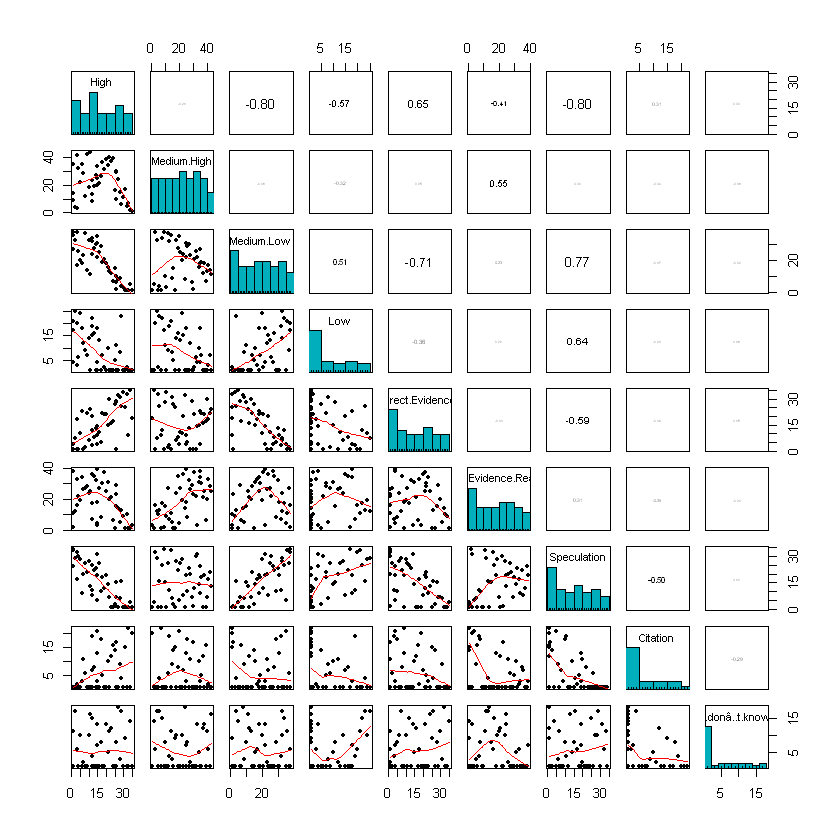

In [5]:
q1.1_q1.2 <- read.csv("C:\\Users\\marpr\\Desktop\\docto\\S1_q1.1_q1.csv", header = T, sep = ";")
# png('Correlation_S1_q1.1_q1.2.png', width = 3.25,
#   height    = 3.25,
#   units     = "in",
#   res       = 1200,
#   pointsize = 3)
# chart.Correlation(q1.1_q1.2, histogram=TRUE, pch=139)
p <- pairs.panels(q1.1_q1.2, 
             method = "spearman", # correlation method
             hist.col = "#00AFBB",
             density = FALSE,  # show density plots
             ellipses = FALSE,# show correlation ellipses
             scale = TRUE,
             cor = TRUE,
#              pch=21,
#              ci = TRUE,
            
            
             )
# print(p)
# dev.off()

# Basis and certainty correlation - Survey 2

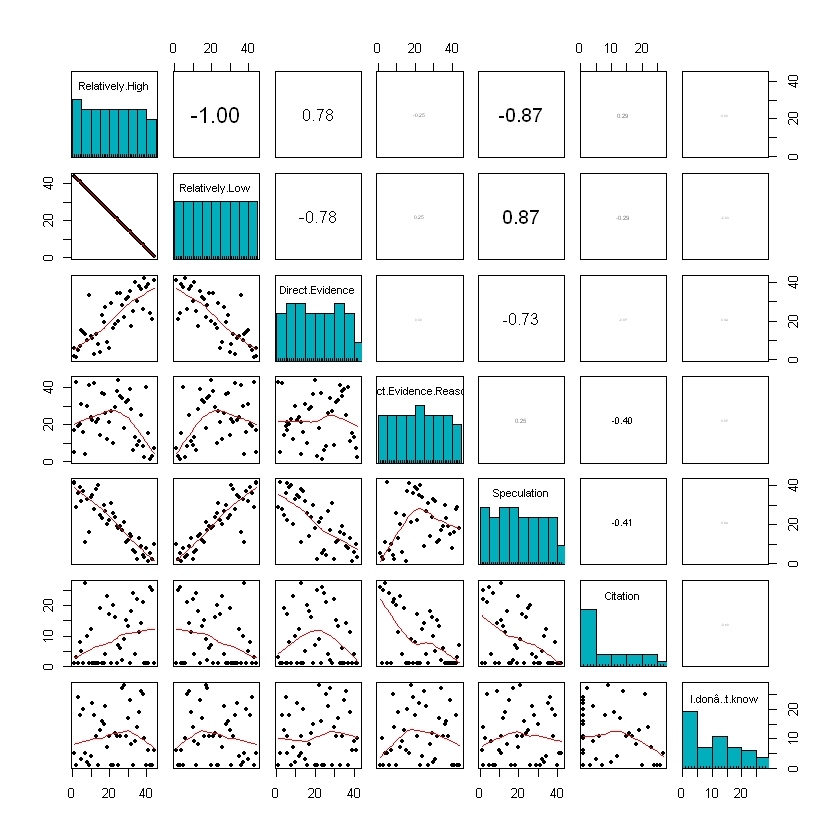

In [6]:
q1.1_q1.2 <- read.csv("C:\\Users\\marpr\\Desktop\\docto\\S2_q1.1_q1.csv", header = T, sep = ";")
# png('Correlation_S2_q1.1_q1.2.png', width = 3.25,
#   height    = 3.25,
#   units     = "in",
#   res       = 1200,
#   pointsize = 3)
# chart.Correlation(q1.1_q1.2, histogram=TRUE, pch=139)
p <- pairs.panels(q1.1_q1.2, 
             method = "spearman", # correlation method
             hist.col = "#00AFBB",
             density = FALSE,  # show density plots
             ellipses = FALSE,# show correlation ellipses
             scale = TRUE,
#              cor = TRUE,
#              pch=21,
#              ci = TRUE,
            
            
             )
# print(p)
# dev.off()

# Basis and certainty correlation - Survey 3

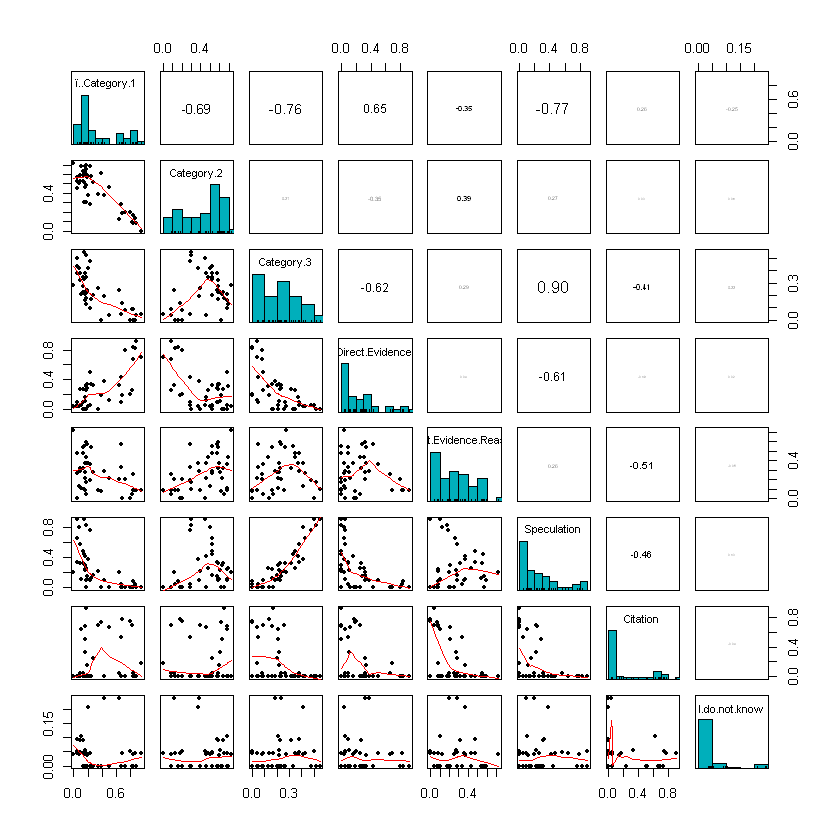

In [7]:
q1.1_q1.2 <- read.csv("C:\\Users\\marpr\\Desktop\\docto\\thesis\\S3_q1.1_q1.2.csv", header = T, sep = ";")
# png('Correlation_S3_q1.1_q1.2.png', width = 3.25,
#   height    = 3.25,
#   units     = "in",
#   res       = 1200,
#   pointsize = 3)
# chart.Correlation(q1.1_q1.2, histogram=TRUE, pch=139)
p <- pairs.panels(q1.1_q1.2, 
             method = "spearman", # correlation method
             hist.col = "#00AFBB",
             density = FALSE,  # show density plots
             ellipses = FALSE,# show correlation ellipses
             scale = TRUE,
#              cor = TRUE,
#              pch=21,
#              ci = TRUE,
            
            
             )
# print(p)
# dev.off()